In [2]:
import requests
import os
import pandas as pd
import io


def scraper(url):
    stations = ["Alachua_260", "Apopka_320", "Arcadia_490", "Avalon_304", "Babson Park_400", "Balm_350", "Belle Glade_410", "Bristol_190", "Bronson_230", 
                "Brooksville South_315", "Carrabelle_150", "Citra_250", "Clewiston_405", "Dade City_311", "DeFuniak Springs_120", "Dover", 
                "Fort Lauderdale_420", "Fort Pierce_430", "Hastings_270", "Homestead_440", "Immokalee_450", "Jay_110", "Joshua_241", "Kenansville_340", 
                "Lake Alfred_330", "Lecanto_275", "Live Oak_170", "Macclenny_180", "Marianna_130", "Mayo_121", "Monticello_160","North Port_480", "Ocklawaha_280",
                "Okahumpka_303","Okeechobee_455","Ona_380","Palmdale_460","Panama City_125","Pierson_290","Poinciana_335","Putnam Hall_240","Quincy_140","Sebring_470",
                "St. Lucie West_435","Tiger Creek_395","Umatilla_302","Wellington_425"]
    
    years = ["2021.csv", "2022.csv", "2023.csv"]
    dataframe = []
    for station in stations:
        for year in years:
            file_url = url + station + "/" + year
            response = requests.get(file_url)
            if response.status_code == 200:
                df = pd.read_csv(io.StringIO(response.text))
                dataframe.append(df)
          
    final_df = pd.concat(dataframe, ignore_index=True)    
    return final_df

 

In [3]:
data = scraper("https://fawn.ifas.ufl.edu/data/fawnpub/daily_summaries/BY_STATION/")

merged: Alachua_2602021.csv
merged: Alachua_2602022.csv
merged: Alachua_2602023.csv
merged: Apopka_3202021.csv
merged: Apopka_3202022.csv
merged: Apopka_3202023.csv
merged: Arcadia_4902021.csv
merged: Arcadia_4902022.csv
merged: Arcadia_4902023.csv
merged: Avalon_3042021.csv
merged: Avalon_3042022.csv
merged: Avalon_3042023.csv
Failed to merge: Babson Park_4002021.csv
merged: Babson Park_4002022.csv
merged: Babson Park_4002023.csv
merged: Balm_3502021.csv
merged: Balm_3502022.csv
merged: Balm_3502023.csv
merged: Belle Glade_4102021.csv
merged: Belle Glade_4102022.csv
merged: Belle Glade_4102023.csv
Failed to merge: Bristol_1902021.csv
merged: Bristol_1902022.csv
merged: Bristol_1902023.csv
merged: Bronson_2302021.csv
merged: Bronson_2302022.csv
merged: Bronson_2302023.csv
merged: Brooksville South_3152021.csv
merged: Brooksville South_3152022.csv
merged: Brooksville South_3152023.csv
merged: Carrabelle_1502021.csv
merged: Carrabelle_1502022.csv
merged: Carrabelle_1502023.csv
merged: Ci

In [4]:
data.drop(columns=data.columns[-150:], axis=1, inplace=True)

In [5]:
data.columns.values

array(['StationID', 'Date Time', 'Soil Temp (C) Avg', 'Soil Temp (C) Min',
       'Soil Temp (C) Max', 'Temp @ 60cm (C) Avg', 'Temp @ 60cm (C) Min',
       'Temp @ 60cm (C) Max', 'Temp @ 2m (C) Avg', 'Temp @ 2m (C) Min',
       'Temp @ 2m (C) Max', 'Temp @ 10m (C) Avg', 'Temp @ 10m (C) Min',
       'Temp @ 10m (C) Max', 'Relative Humidity (%) Avg',
       'Dew Point Temp (C) Avg', 'Dew Point Temp (C) Min',
       'Dew Point Temp (C) Max', 'Rainfall Amount (in) Sum',
       'Wind Speed (mph) Avg', 'Wind Speed (mph) Max',
       'Wind Direction (deg) Avg', 'Solar Radiation (w/m2) Avg',
       'Solar Radiation (MJ/m2) Sum', 'ETo Grass (mm) Avg',
       'Number of Observations'], dtype=object)

In [6]:
data = data.drop(columns= ["StationID", "Date Time", "Number of Observations"])

In [7]:
data = data.dropna()

In [8]:
# lets find the minimum and maximum values of rainfall in our dataset so that we can create a range
min_rainfall = data['Rainfall Amount (in) Sum'].min()
max_rainfall = data['Rainfall Amount (in) Sum'].max()
print(f'Max Rainfall -> {max_rainfall}')
print(f'Min Rainfall -> {min_rainfall}')

Max Rainfall -> 46.51
Min Rainfall -> 0.0


In [8]:
data

,Soil Temp (C) Avg,Soil Temp (C) Min,Soil Temp (C) Max,Temp @ 60cm (C) Avg,Temp @ 60cm (C) Min,Temp @ 60cm (C) Max,Temp @ 2m (C) Avg,Temp @ 2m (C) Min,Temp @ 2m (C) Max,Temp @ 10m (C) Avg,...,Dew Point Temp (C) Avg,Dew Point Temp (C) Min,Dew Point Temp (C) Max,Rainfall Amount (in) Sum,Wind Speed (mph) Avg,Wind Speed (mph) Max,Wind Direction (deg) Avg,Solar Radiation (w/m2) Avg,Solar Radiation (MJ/m2) Sum,ETo Grass (mm) Avg
0,18.02,17.02,19.40,22.98,19.53,28.53,23.24,19.87,28.18,22.82,...,19.81,19.08,21.31,0.00,7.43,13.50,187.08,102.84,8.885520,1.76
1,18.56,17.86,19.32,22.06,18.97,25.60,22.38,19.62,25.55,22.01,...,20.14,18.60,21.22,0.00,7.30,11.64,206.36,56.00,4.838430,1.38
2,18.44,16.76,19.23,15.99,6.22,21.15,16.26,7.12,21.46,16.30,...,13.10,6.31,20.18,0.41,5.23,9.81,278.66,112.29,9.701800,1.36
3,15.42,13.96,16.74,8.89,2.67,17.87,9.17,3.49,17.23,9.38,...,4.51,2.86,7.24,0.00,2.87,8.26,250.10,146.77,12.680800,1.06
4,14.09,12.54,15.71,9.50,1.66,19.85,10.01,2.51,19.30,10.52,...,5.50,2.13,12.36,0.05,4.50,15.19,278.38,129.59,11.196400,1.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42696,27.42,26.74,28.04,25.79,21.53,33.12,25.72,22.05,32.02,25.68,...,24.16,21.67,26.63,1.14,4.90,12.30,100.05,155.86,13.325607,3.02
42697,27.46,26.86,28.00,26.29,22.82,33.19,26.34,23.33,32.45,26.37,...,25.02,22.75,28.01,0.46,4.43,15.28,120.70,126.60,10.938411,2.71
42698,27.48,27.00,28.13,26.13,23.75,31.76,26.10,23.86,30.76,26.11,...,24.67,23.56,26.92,0.11,3.50,8.22,160.35,131.80,11.387943,2.66
42699,27.58,26.98,28.06,26.16,22.78,31.11,26.35,23.86,30.38,26.32,...,25.24,23.64,28.00,0.01,2.55,7.01,171.48,118.18,10.210941,2.44


In [9]:
import numpy as np
q1 = np.percentile(data['Rainfall Amount (in) Sum'], 25)
median = np.percentile(data['Rainfall Amount (in) Sum'], 50)
q3 = np.percentile(data['Rainfall Amount (in) Sum'], 75)

In [15]:
q3

0.05

In [10]:
bins = [-float("inf"), 0.01, 1.0 , float('inf')]
        

# Define labels for the bins
labels = ['0-0.01', '0.01-1.0',float("inf")]

# Use pd.cut() to create the intervals
data = data.copy()
data.loc[:, 'zones'] = pd.cut(data['Rainfall Amount (in) Sum'], bins=bins, labels=labels, right=False)

In [11]:
data['Rainfall Amount (in) Sum'].describe()

count    40437.000000
mean         0.151922
std          0.522670
min          0.000000
25%          0.000000
50%          0.000000
75%          0.050000
max         46.510000
Name: Rainfall Amount (in) Sum, dtype: float64

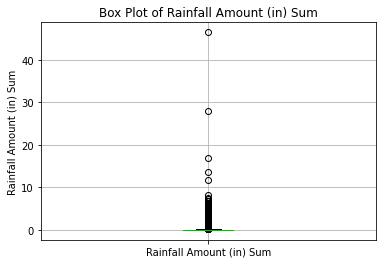

In [12]:
import matplotlib.pyplot as plt

data.boxplot(column='Rainfall Amount (in) Sum')
plt.ylabel('Rainfall Amount (in) Sum')
plt.title('Box Plot of Rainfall Amount (in) Sum')
plt.show()

In [60]:
c = 0
for v in data['Rainfall Amount (in) Sum']:
    if v >= 1.0:
        c += 1
print(c)

1847


In [58]:
data['zones'].describe()

count     40437
unique        3
top       0-0.2
freq      33774
Name: zones, dtype: object

In [13]:
y_encoded = pd.get_dummies(data['zones'])

In [14]:
y_encoded


,0-0.01,0.01-1.0,inf
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
42696,0,0,1
42697,0,1,0
42698,0,1,0
42699,0,1,0


In [104]:
c = 0
for v in y_encoded[float("inf")]:
    if v == 0.0:
        c += 1
print(c)

38590


In [15]:
X = data.drop(columns = ['Rainfall Amount (in) Sum', 'zones'], axis = 1)

In [44]:
X

,Soil Temp (C) Avg,Soil Temp (C) Min,Soil Temp (C) Max,Temp @ 60cm (C) Avg,Temp @ 60cm (C) Min,Temp @ 60cm (C) Max,Temp @ 2m (C) Avg,Temp @ 2m (C) Min,Temp @ 2m (C) Max,Temp @ 10m (C) Avg,...,Relative Humidity (%) Avg,Dew Point Temp (C) Avg,Dew Point Temp (C) Min,Dew Point Temp (C) Max,Wind Speed (mph) Avg,Wind Speed (mph) Max,Wind Direction (deg) Avg,Solar Radiation (w/m2) Avg,Solar Radiation (MJ/m2) Sum,ETo Grass (mm) Avg
0,18.02,17.02,19.40,22.98,19.53,28.53,23.24,19.87,28.18,22.82,...,82.11,19.81,19.08,21.31,7.43,13.50,187.08,102.84,8.885520,1.76
1,18.56,17.86,19.32,22.06,18.97,25.60,22.38,19.62,25.55,22.01,...,87.47,20.14,18.60,21.22,7.30,11.64,206.36,56.00,4.838430,1.38
2,18.44,16.76,19.23,15.99,6.22,21.15,16.26,7.12,21.46,16.30,...,83.23,13.10,6.31,20.18,5.23,9.81,278.66,112.29,9.701800,1.36
3,15.42,13.96,16.74,8.89,2.67,17.87,9.17,3.49,17.23,9.38,...,76.71,4.51,2.86,7.24,2.87,8.26,250.10,146.77,12.680800,1.06
4,14.09,12.54,15.71,9.50,1.66,19.85,10.01,2.51,19.30,10.52,...,77.26,5.50,2.13,12.36,4.50,15.19,278.38,129.59,11.196400,1.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42696,27.42,26.74,28.04,25.79,21.53,33.12,25.72,22.05,32.02,25.68,...,91.77,24.16,21.67,26.63,4.90,12.30,100.05,155.86,13.325607,3.02
42697,27.46,26.86,28.00,26.29,22.82,33.19,26.34,23.33,32.45,26.37,...,92.80,25.02,22.75,28.01,4.43,15.28,120.70,126.60,10.938411,2.71
42698,27.48,27.00,28.13,26.13,23.75,31.76,26.10,23.86,30.76,26.11,...,92.22,24.67,23.56,26.92,3.50,8.22,160.35,131.80,11.387943,2.66
42699,27.58,26.98,28.06,26.16,22.78,31.11,26.35,23.86,30.38,26.32,...,93.90,25.24,23.64,28.00,2.55,7.01,171.48,118.18,10.210941,2.44


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# KNN + Normal Data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

 
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.6752390372568414
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      7640
           1       0.65      0.44      0.53      3977
           2       0.69      0.06      0.11       515

   micro avg       0.77      0.68      0.72     12132
   macro avg       0.72      0.45      0.49     12132
weighted avg       0.76      0.68      0.70     12132
 samples avg       0.68      0.68      0.68     12132



C:\Users\17866\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
import numpy as np

# KNN + SMOTE + RandomUnderSampler 
X_np = X.to_numpy()
y_encoded_np = y_encoded.to_numpy()
X_reshaped = X_np.reshape(-1, 22)
y_reshaped = y_encoded_np.reshape(-1, 3)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42, stratify=y_reshaped)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


pipeline = Pipeline([
    ('oversampling', SMOTE(random_state=42)),
    ('undersampling', RandomUnderSampler(random_state=42))
])


X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.6545499505440159
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80      6372
           1       0.30      0.48      0.37      1347
           2       0.16      0.38      0.23       369

   micro avg       0.67      0.65      0.66      8088
   macro avg       0.46      0.52      0.47      8088
weighted avg       0.78      0.65      0.70      8088
 samples avg       0.65      0.65      0.65      8088



C:\Users\17866\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Decision Tree + Normal Data
X = data.drop(columns = ['Rainfall Amount (in) Sum', 'zones'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
  




Accuracy: 0.6795252225519288
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      5073
           1       0.54      0.53      0.54      2673
           2       0.23      0.27      0.25       342

   micro avg       0.68      0.68      0.68      8088
   macro avg       0.52      0.53      0.52      8088
weighted avg       0.68      0.68      0.68      8088
 samples avg       0.68      0.68      0.68      8088



In [17]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Random Forest + Normal Data -> Promising results
X = data.drop(columns = ['Rainfall Amount (in) Sum', 'zones'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.7516073194856577
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      5073
           1       0.70      0.58      0.64      2673
           2       0.75      0.10      0.17       342

   micro avg       0.79      0.75      0.77      8088
   macro avg       0.76      0.52      0.56      8088
weighted avg       0.79      0.75      0.76      8088
 samples avg       0.75      0.75      0.75      8088



C:\Users\17866\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
X.shape

(40437, 22)

In [38]:
y_encoded.shape

(40437, 3)

ModuleNotFoundError: No module named 'dbn'

In [32]:
X_reduced = data.drop(columns = ['Rainfall Amount (in) Sum', 'zones', 'Solar Radiation (MJ/m2) Sum', 'Wind Direction (deg) Avg',
                                'ETo Grass (mm) Avg', 'Soil Temp (C) Avg'], axis = 1)

In [22]:
# Showing the weight each feature has for RandomForestClassifier
feature_importance = clf.feature_importances_

 
feature_names = X_reduced.columns

 
sorted_idx = feature_importance.argsort()[::-1]

 
for i in range(len(sorted_idx)):
    print(f"Feature {feature_names[sorted_idx[i]]}: {feature_importance[sorted_idx[i]]}")

Feature Relative Humidity (%) Avg: 0.1341219121329885
Feature Solar Radiation (w/m2) Avg: 0.09986320969529097
Feature Wind Speed (mph) Max: 0.07142596299433619
Feature Dew Point Temp (C) Max: 0.06416149324300434
Feature Dew Point Temp (C) Min: 0.052197806084719515
Feature Temp @ 60cm (C) Min: 0.05217203372806191
Feature Soil Temp (C) Min: 0.04877560552835999
Feature Soil Temp (C) Max: 0.04779998295404712
Feature Temp @ 60cm (C) Max: 0.046961112227920716
Feature Temp @ 10m (C) Min: 0.04597492427964966
Feature Wind Speed (mph) Avg: 0.045857246887725474
Feature Dew Point Temp (C) Avg: 0.045487765218100135
Feature Temp @ 10m (C) Max: 0.04357619110617655
Feature Temp @ 2m (C) Max: 0.04242638054775218
Feature Temp @ 2m (C) Min: 0.04163205327776922
Feature Temp @ 2m (C) Avg: 0.03970310557293742
Feature Temp @ 60cm (C) Avg: 0.03938453261644333
Feature Temp @ 10m (C) Avg: 0.03847868190471666


In [35]:
!pip install xgboost

In [18]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# XGB + Normal Data
X_np = X.to_numpy()
y_encoded_np = y_encoded.to_numpy()


X_reshaped = X_np.reshape(-1, 22)


X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded_np, test_size=0.3, random_state=42, stratify=y_encoded_np)


clf = XGBClassifier(
    objective='multi:softmax',  
    num_class=3,              
    random_state=42)          

clf.fit(X_train, np.argmax(y_train, axis=1))  


y_pred = clf.predict(X_test)


y_test_labels = np.argmax(y_test, axis=1)


accuracy = accuracy_score(y_test_labels, y_pred)
report = classification_report(y_test_labels, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", report)




Accuracy: 0.7818166831519947
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      7622
           1       0.68      0.64      0.66      3956
           2       0.57      0.16      0.24       554

    accuracy                           0.78     12132
   macro avg       0.70      0.57      0.59     12132
weighted avg       0.77      0.78      0.77     12132



In [20]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# RandomForest + SMOTE + RandomUnderSampler
X_np = X.to_numpy()
y_encoded_np = y_encoded.to_numpy()


X_reshaped = X_np.reshape(-1, 22)

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded_np, test_size=0.2, random_state=42, stratify=y_encoded_np)




resampling_pipeline = Pipeline([
    ('oversample', SMOTE(random_state=42)),              # Oversampling with SMOTE
    ('undersample', RandomUnderSampler(random_state=42))  # Undersampling with RandomUnderSampler
])

# Fit and transform the training data using the resampling pipeline
X_resampled, y_resampled = resampling_pipeline.fit_resample(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(random_state=42)


clf.fit(X_resampled, y_resampled)
from sklearn.metrics import accuracy_score, classification_report


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", report)



Accuracy: 0.6745796241345203
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      5081
           1       0.65      0.50      0.56      2638
           2       0.38      0.37      0.38       369

   micro avg       0.79      0.67      0.73      8088
   macro avg       0.64      0.55      0.59      8088
weighted avg       0.78      0.67      0.72      8088
 samples avg       0.67      0.67      0.67      8088



C:\Users\17866\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
data.skew().sort_values(ascending=False)

C:\Users\17866\AppData\Local\Temp\ipykernel_8948\4149922023.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew().sort_values(ascending=False)


Rainfall Amount (in) Sum       26.049628
Wind Speed (mph) Max            3.270177
Wind Speed (mph) Avg            1.467519
Wind Direction (deg) Avg        0.133901
ETo Grass (mm) Avg              0.065837
Solar Radiation (w/m2) Avg     -0.243588
Solar Radiation (MJ/m2) Sum    -0.252665
Soil Temp (C) Max              -0.392056
Soil Temp (C) Avg              -0.617659
Soil Temp (C) Min              -0.769518
Temp @ 2m (C) Min              -0.930854
Temp @ 60cm (C) Min            -0.931906
Temp @ 10m (C) Min             -0.999021
Temp @ 60cm (C) Avg            -1.042268
Temp @ 60cm (C) Max            -1.068883
Temp @ 2m (C) Avg              -1.069891
Temp @ 10m (C) Max             -1.080656
Relative Humidity (%) Avg      -1.082487
Temp @ 10m (C) Avg             -1.083534
Temp @ 2m (C) Max              -1.124639
Dew Point Temp (C) Avg         -1.226296
Dew Point Temp (C) Max         -1.295445
Dew Point Temp (C) Min         -2.270755
dtype: float64

In [34]:
!pip install protobuf==3.20.0 --user

In [71]:
import tensorflow as tf

In [29]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from scikeras.wrappers import KerasClassifier

# Define a function to create your neural network model
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(128, input_dim=22, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier for use in GridSearchCV
model = KerasClassifier(model=create_model, epochs = 20, batch_size = 32)

# Define the hyperparameters and their possible values for the grid search
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'dropout_rate': [0.0, 0.2, 0.4]
}
 
    
# Create the grid search object with your model and hyperparameter grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring= make_scorer(accuracy_score), cv=3)

# Fit the grid search to your data
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and results
print(f"Best Accuracy: {grid_result.best_score_:.4f} using {grid_result.best_params_}")


ValueError: Invalid parameter activation for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(activation=relu)`
Check the list of available parameters with `estimator.get_params().keys()`

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Sequential FeedForward + Normal Data + Scaled + Early Stopping -> Best model
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



scaler = StandardScaler()


X_train_normalized = scaler.fit_transform(X_train)


X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)


 


 


model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(X_train_normalized.shape[1],)))
#model.add(BatchNormalization())  # Add Batch Normalization for stability
model.add(Dropout(0.3))
model.add(Dense(128, activation='sigmoid'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


def lr_scheduler(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.0001

lr_schedule = LearningRateScheduler(lr_scheduler)


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train_normalized, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val_normalized, y_val), callbacks=[early_stopping, lr_schedule])


loss, accuracy = model.evaluate(X_test_normalized, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


y_pred = model.predict(X_test_normalized)


y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/100
1138/1138 [==============================] - 6s 4ms/step - loss: 0.6592 - accuracy: 0.7065 - val_loss: 0.5911 - val_accuracy: 0.7443 - lr: 0.0010
Epoch 2/100
1138/1138 [==============================] - 4s 3ms/step - loss: 0.6009 - accuracy: 0.7424 - val_loss: 0.5752 - val_accuracy: 0.7542 - lr: 0.0010
Epoch 3/100
1138/1138 [==============================] - 4s 3ms/step - loss: 0.5876 - accuracy: 0.7469 - val_loss: 0.5584 - val_accuracy: 0.7567 - lr: 0.0010
Epoch 4/100
1138/1138 [==============================] - 4s 3ms/step - loss: 0.5777 - accuracy: 0.7501 - val_loss: 0.5545 - val_accuracy: 0.7641 - lr: 0.0010
Epoch 5/100
1138/1138 [==============================] - 4s 3ms/step - loss: 0.5723 - accuracy: 0.7538 - val_loss: 0.5482 - val_accuracy: 0.7636 - lr: 0.0010
Epoch 6/100
1138/1138 [==============================] - 4s 3ms/step - loss: 0.5695 - accuracy: 0.7544 - val_loss: 0.5438 - val_accuracy: 0.7636 - lr: 0.0010
Epoch 7/100
1138/1138 [=============================

64/64 [==============================] - 0s 3ms/step - loss: 0.5048 - accuracy: 0.7864
Test loss: 0.5048
Test accuracy: 0.7864
64/64 [==============================] - 0s 2ms/step


In [38]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Sequential FeedForward + SMOTE + RandomUnderSampler
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()


X_train_normalized = scaler.fit_transform(X_train)


X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)
pipeline = Pipeline([
    ('oversampling', SMOTE(random_state=42)),
    ('undersampling', RandomUnderSampler(random_state=42))
])


X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train.values)


model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(X_train_resampled.shape[1],)))
model.add(BatchNormalization())  
#model.add(Dropout(0.3))
model.add(Dense(128, activation='sigmoid'))
model.add(BatchNormalization())
#model.add(Dropout(0.3))
model.add(Dense(y_train_resampled.shape[1], activation='softmax'))


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# lower learning rate when epoch > 10
def lr_scheduler(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.0001

lr_schedule = LearningRateScheduler(lr_scheduler)


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train_resampled, y_train_resampled, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[early_stopping, lr_schedule])


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


y_pred = model.predict(X_test)


y_pred_classes = np.argmax(y_pred, axis=1)


Epoch 1/100
2143/2143 [==============================] - 11s 4ms/step - loss: 0.8437 - accuracy: 0.5957 - val_loss: 0.6825 - val_accuracy: 0.6958 - lr: 0.0010
Epoch 2/100
2143/2143 [==============================] - 8s 4ms/step - loss: 0.7645 - accuracy: 0.6439 - val_loss: 0.6487 - val_accuracy: 0.6944 - lr: 0.0010
Epoch 3/100
2143/2143 [==============================] - 8s 4ms/step - loss: 0.7368 - accuracy: 0.6565 - val_loss: 1.2435 - val_accuracy: 0.3961 - lr: 0.0010
Epoch 4/100
2143/2143 [==============================] - 8s 4ms/step - loss: 0.7170 - accuracy: 0.6658 - val_loss: 0.6707 - val_accuracy: 0.6815 - lr: 0.0010
Epoch 5/100
2143/2143 [==============================] - 9s 4ms/step - loss: 0.7103 - accuracy: 0.6681 - val_loss: 0.5945 - val_accuracy: 0.7260 - lr: 0.0010
Epoch 6/100
 409/2143 [====>.........................] - ETA: 7s - loss: 0.7038 - accuracy: 0.6744

KeyboardInterrupt: 

In [88]:
from sklearn.neural_network import BernoulliRBM
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# RBM to extract features from dataset -> fed to RandomForest
# Normal data
rbm = BernoulliRBM(n_components=256, learning_rate=0.1, n_iter=10)
rbm.fit(X_train)


X_train_features = rbm.transform(X_train)
X_test_features = rbm.transform(X_test)


X_train_combined = np.concatenate((X_train, X_train_features), axis=1)
X_test_combined = np.concatenate((X_test, X_test_features), axis=1)


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_combined, y_train)


accuracy = clf.score(X_test_combined, y_test)



print("Accuracy:", accuracy)


Accuracy: 0.7425816023738873


In [108]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split

# 1D CNN, Normal data, early stopping to prevent overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)
X_train = X_train.values
X_test = X_test.values
scaler = StandardScaler()


X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)
num_data_points, num_features = X_train.shape


X_train = X_train.reshape(num_data_points, num_features, 1)
X_test = X_test.reshape(X_test.shape[0], num_features, 1)




model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(num_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.5, callbacks=[early_stopping, lr_schedule])


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


y_pred = model.predict(X_test)


Epoch 1/40


C:\Users\rober\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


569/569 [==============================] - 3s 4ms/step - loss: 0.8679 - accuracy: 0.6716 - val_loss: 0.6473 - val_accuracy: 0.7289 - lr: 0.0010
Epoch 2/40
569/569 [==============================] - 2s 3ms/step - loss: 0.6874 - accuracy: 0.7122 - val_loss: 0.6848 - val_accuracy: 0.6737 - lr: 0.0010
Epoch 3/40
569/569 [==============================] - 2s 3ms/step - loss: 0.6568 - accuracy: 0.7147 - val_loss: 0.6281 - val_accuracy: 0.7210 - lr: 0.0010
Epoch 4/40
569/569 [==============================] - 2s 3ms/step - loss: 0.6314 - accuracy: 0.7305 - val_loss: 0.5929 - val_accuracy: 0.7444 - lr: 0.0010
Epoch 5/40
569/569 [==============================] - 2s 3ms/step - loss: 0.6158 - accuracy: 0.7362 - val_loss: 0.6145 - val_accuracy: 0.7276 - lr: 0.0010
Epoch 6/40
569/569 [==============================] - 2s 3ms/step - loss: 0.6042 - accuracy: 0.7423 - val_loss: 0.5854 - val_accuracy: 0.7545 - lr: 0.0010
Epoch 7/40
569/569 [==============================] - 2s 3ms/step - loss: 0.6055 

In [104]:
# 1D CNN + SMOTE + RandomUnderSampler



X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)
pipeline = Pipeline([
    ('oversampling', SMOTE(random_state=42)),
    ('undersampling', RandomUnderSampler(random_state=42))
])


X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train.values)


X_train_resampled = X_train_resampled.values
X_test = X_test.values


num_data_points, num_features = X_train_resampled.shape


X_train_resampled = X_train_resampled.reshape(num_data_points, num_features, 1)
X_test = X_test.reshape(X_test.shape[0], num_features, 1)


model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(num_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(X_train_resampled, y_train_resampled, epochs=40, batch_size=32, validation_split=0.5, callbacks=[early_stopping, lr_schedule])


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


y_pred = model.predict(X_test)


Epoch 1/40
1072/1072 [==============================] - 5s 3ms/step - loss: 0.5870 - accuracy: 0.7295 - val_loss: 11.6883 - val_accuracy: 0.2334 - lr: 0.0010
Epoch 2/40
1072/1072 [==============================] - 3s 3ms/step - loss: 0.5144 - accuracy: 0.7577 - val_loss: 11.9106 - val_accuracy: 0.3173 - lr: 0.0010
Epoch 3/40
1072/1072 [==============================] - 3s 3ms/step - loss: 0.4887 - accuracy: 0.7719 - val_loss: 11.7683 - val_accuracy: 0.2720 - lr: 0.0010
Epoch 4/40
1072/1072 [==============================] - 3s 3ms/step - loss: 0.4706 - accuracy: 0.7792 - val_loss: 10.2868 - val_accuracy: 0.1245 - lr: 0.0010
Epoch 5/40
1072/1072 [==============================] - 3s 3ms/step - loss: 0.4667 - accuracy: 0.7850 - val_loss: 10.6427 - val_accuracy: 0.1261 - lr: 0.0010
Epoch 6/40
1072/1072 [==============================] - 3s 3ms/step - loss: 0.4541 - accuracy: 0.7907 - val_loss: 9.9193 - val_accuracy: 0.1153 - lr: 0.0010
Epoch 7/40
1072/1072 [==============================]